Dataset of delivery fleet driver data. For each driver we have two features: mean distance driven per day and the mean percentage of time a driver was >5 mph over the speed limit.**

***>>Run the K-Means algorithm on this dataset and find the optimal number of clusters. What insights can you gather from these clusters?***

***>>Perform Agglomerative clustering on the same dataset with an appropriate number of clusters. Plot the dendrogram.***

***>>Compare the results from your K-Means model and your Hierarchical clustering model using silhouette scores. Which model is superior?***


In [1]:
pwd

'C:\\Users\\ARPIT\\Desktop'

## K-Means Clustering using Scikit-Learn

### Dataset of delivery fleet driver data. For each driver we have two features: mean distance driven per day and the mean percentage of time a driver was >5 mph over the speed limit.

About Dataset: This dataset has two columns Distance_Feature Columns and Speeding_Feature. Now as per my understanding The distance column says the mean distance driven by driver per day & Speeding feature says the mean percentage of time the driver was 5MPH more than its speed limit.

Lets Understand by an example:
* Suppose Speed Limit is : 40km/hr
* Gr.than Speed Limit 5 MPH = 8km/hr
* Overspeed: 48km/hr
* Total Driving Hours: 8hrs.
* If a data point is given that Speeding Feature=28% then ((28 * 8)/100)=2.24 hrs.
* So, for 2.24 hr out of 8 hrs driving. The person drives vehicle over The speed limit > 5MPH. (i.e 48km/hr)

### Objective: Run the K-Means algorithm on this dataset and find the optimal number of clusters. What insights can you gather from these clusters also Compare the results from your K-Means model and your Hierarchical clustering model using silhouette scores.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
driver_data= pd.read_csv("C:\\Users\\ARPIT\\Desktop\\UC-14000\\driver_data.csv")

In [4]:
driver_data.head(5)

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


### Sumary Statistics about Data

In [5]:
driver_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Distance_Feature,4000.0,76.041523,53.469563,15.52,45.2475,53.33,65.6325,244.79
Speeding_Feature,4000.0,10.721000,13.708543,0.00,4.0000,6.00,9.0000,100.00


In [6]:
print(driver_data.shape)
print(driver_data.info())

(4000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Distance_Feature  4000 non-null   float64
 1   Speeding_Feature  4000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 62.6 KB
None


In [7]:
for k, v in driver_data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(driver_data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column Distance_Feature outliers = 20.00%
Column Speeding_Feature outliers = 15.57%


#### The above Shown Outlier Percentage in data are not actually an outliers. Because 20% of values in data we will not consider it as outliers.
#### Below is the Box Plot of the features

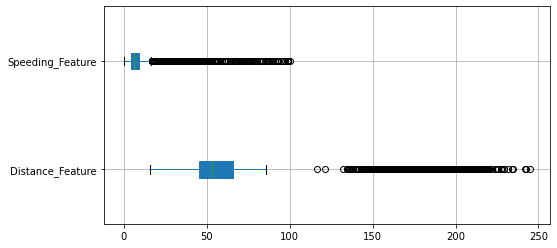

In [8]:
plt.figure(figsize=(8,4))
driver_data.boxplot(patch_artist=True,vert=False)

### EDA 

#### Scatter Plot between  Speeding_Feature &  Distance Feature. On abscissa Speeding_Feature is plotted and on ordinate Distance_Feature is plotted to show the datapoint distribution and also to get rough idea what could be the No. of Clusters (Manual Vizualization)

(0.0, 256.2535)

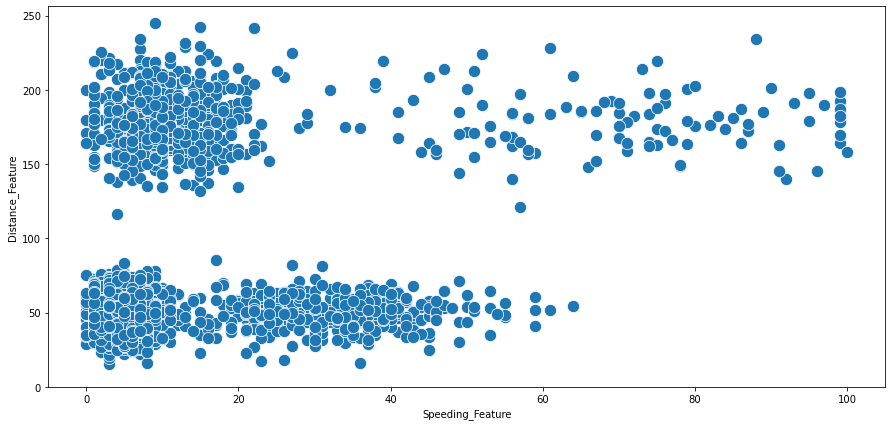

In [9]:
plt.figure(figsize=(15,7))
sns.scatterplot(x="Speeding_Feature", y="Distance_Feature", data=driver_data, markers='o', edgecolors='black', s=150)
plt.ylim(0,)

#### The Below shown Jointplot is a Plot between Speeding_Feature and Distace_Feature From the plot we can see that datapoints in Both the features are Right Skewed and regression plot shows a Positive Slope i.e. Speeding_Feature(Time > 5 MPH Overspeeding) increases the distance increases which is obvious.

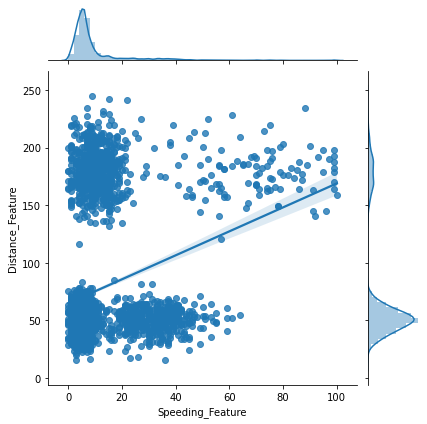

In [10]:
sns.jointplot(x="Speeding_Feature", y="Distance_Feature", data=driver_data, kind="reg");

### Data Preprocessing

#### Feature Scaling the Data by Using StandardScaler such that  Mean = 0  &  Standard Deviation = 1 

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
std_scale = StandardScaler().fit(driver_data) 

In [13]:
driver_data_scaled = std_scale.transform(driver_data)

In [14]:
driver_data_scaled[:5,]

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       [-0.38066642,  0.8228745 ],
       [-0.40142849,  1.04174351]])

#### Running multiple iteration of KMeans algorithm to find an optimal number of clusters using elbow method and also using Silhoutte Score.

In [15]:
from sklearn.cluster import KMeans 
import sklearn.cluster as cluster # Importing K-Means

In [16]:
ssq = []
for K in range(1,11):
    kmeans_model = KMeans(n_clusters=K, random_state=123)
    kmeans_model.fit(driver_data_scaled)
    ssq.append(kmeans_model.inertia_)

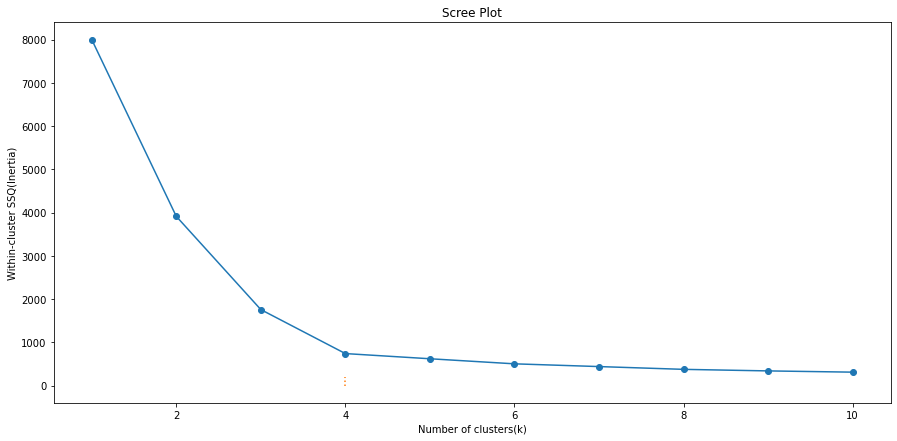

In [17]:
plt.figure(figsize=(15,7))
plt.plot(range(1,11), ssq, marker='o')
plt.xlabel("Number of clusters(k)")
plt.ylabel("Within-cluster SSQ(Inertia)")
plt.title("Scree Plot")
plt.plot([4]*200, range(1,201), ":")
plt.show()

From the result we see that Four should be the optimal number of clusters for the given data as After 4th Cluster the change in number of Clusters won't give that effective result. 

* So Let's consider No. of Clusters = 4

### K-Means Clustering

In [18]:
km = KMeans(n_clusters=4, random_state=123)
km.fit(driver_data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

*Make predictions for the clusters of the given dataset*

In [19]:
predicted_cluster = km.predict(driver_data_scaled)

In [20]:
predicted_cluster[:15]

array([2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2])

#### Checking and Determining the No. of Clusters taken by using Silhoutte Score

In [21]:
import sklearn.metrics as metrics
labels=cluster.KMeans(n_clusters=7,random_state=200).fit(driver_data_scaled).labels_

In [22]:
metrics.silhouette_score(driver_data_scaled,labels,metric="euclidean",sample_size=4000,random_state=200)

0.6637727890082448

In [23]:
for i in range(2,8):
    labels=cluster.KMeans(n_clusters=i,random_state=123).fit(driver_data_scaled).labels_
    print ("Silhoutte score for k= "+str(i)+" is "+str(metrics.silhouette_score(driver_data_scaled,labels,metric="euclidean",random_state=200)))

Silhoutte score for k= 2 is 0.7075955632562074
Silhoutte score for k= 3 is 0.7636008195604073
Silhoutte score for k= 4 is 0.7843727073779401
Silhoutte score for k= 5 is 0.7341393562942305
Silhoutte score for k= 6 is 0.7338749612229677
Silhoutte score for k= 7 is 0.4273128434295609


#### From the above Silhoutte Score we can see that Selecting K=4 using elbow method is correct decision. So K=4 gives better score. Let's Plot the Output 

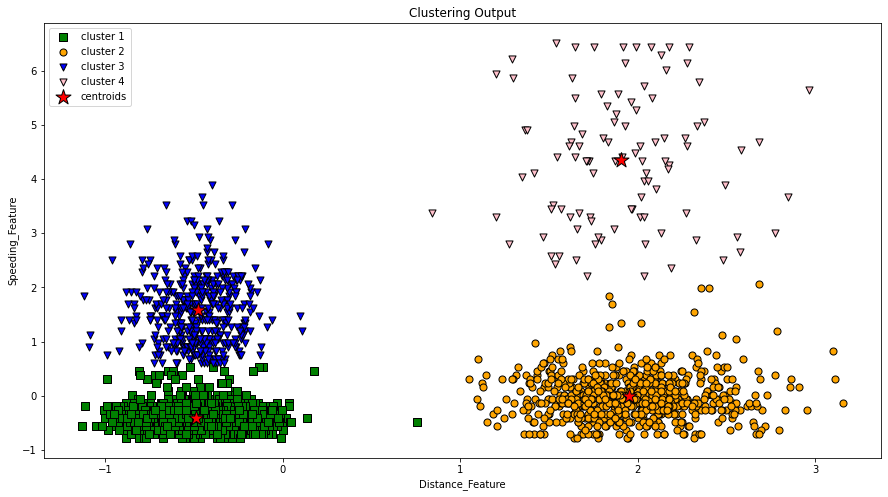

In [24]:
f, ax = plt.subplots(figsize=(15,8))
plt.scatter(driver_data_scaled[predicted_cluster==0,0], driver_data_scaled[predicted_cluster==0, 1], s=50, c='green',\
           marker='s', edgecolors='black', label='cluster 1')
plt.scatter(driver_data_scaled[predicted_cluster==1,0], driver_data_scaled[predicted_cluster==1, 1], s=50, c='orange',\
           marker='o', edgecolors='black', label='cluster 2')
plt.scatter(driver_data_scaled[predicted_cluster==2,0], driver_data_scaled[predicted_cluster==2, 1], s=50, c='blue',\
           marker='v', edgecolors='black', label='cluster 3')
plt.scatter(driver_data_scaled[predicted_cluster==3,0], driver_data_scaled[predicted_cluster==3, 1], s=50, c='pink',\
           marker='v', edgecolors='black', label='cluster 4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, c='red',\
           marker='*', edgecolors='black', label='centroids')
plt.legend(scatterpoints=1)
plt.xlabel("Distance_Feature")
plt.ylabel("Speeding_Feature")
plt.title("Clustering Output")
plt.show()

From the above Clusterring Output we can see Four Clusters these are **Centre Based Clusters** the centre with red star represents **Centroid**. The intra Cluster distance in Cluster No. 1,2,3 are Low which is Good for analytics point, decision making and Making Inferences. But In Cluster 4 we can see that Intra cluster distance is very High which affects the model as datapoints are widely spread. 

The intercluster distance between 1-2 & 1-4 is also high so its a good Sign but Intercluster distance between Cluster-1 7 Cluster 3 is very very low.

In [25]:
print(km.cluster_centers_)

[[-0.48678423 -0.40249736]
 [ 1.95263225 -0.0139714 ]
 [-0.47952334  1.57909169]
 [ 1.90400473  4.34582367]]


In [26]:
predictions_relabelled = np.where(predicted_cluster==0, "Withincity & Slow", np.where(predicted_cluster==1,\
    "Outskirts & Slow", np.where(predicted_cluster==2,"Withincity & Fast","Outskirts & Fast")))
driver_data['category'] = pd.Series(predictions_relabelled, index=driver_data.index)
driver_data.index.name = "Fleet Driver No."

In [27]:
pd.DataFrame(driver_data).head()

,Distance_Feature,Speeding_Feature,category
Fleet Driver No.,,,
0,71.24,28,Withincity & Fast
1,52.53,25,Withincity & Fast
2,64.54,27,Withincity & Fast
3,55.69,22,Withincity & Fast
4,54.58,25,Withincity & Fast


#### Importing Silhouette Score (For K-Means)

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
silhouette_score(driver_data_scaled,predicted_cluster)

0.7843727073779401

#### The above silhouette Score represents that 78.4% of the data within its own cluster (cohesion) are similar as compared to other clusters (separation).

Below is the code for saving segmented data to CSV

In [30]:
#driver_data.to_csv("fleet_segementation_output.csv", index=False)

## Hierarchical Clustering using Scikit-Learn

### Dataset of delivery fleet driver data. For each driver we have two features: mean distance driven per day and the mean percentage of time a driver was >5 mph over the speed limit.

### Objective: Perform Agglomerative clustering on the fleet driver data dataset with an appropriate number of clusters. Plot the dendrogram and Compare the results from your K-Means model and your Hierarchical clustering model using silhouette scores.

 Importing Dendrogram and Linkages from Cluster.hierarchy from Scipy 

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
from scipy.cluster.hierarchy import set_link_color_palette
set_link_color_palette(['black'])

* In the below code snippet we use method as Ward's.
* **Ward's minimum variance criterion** minimizes the total within-cluster variance. To implement this method, at each step we find the pair of clusters that leads to minimum increase in total within-cluster variance after merging. This increase is a **weighted squared distance** between cluster centers. At the initial step, all clusters are singletons (clusters containing a single point). To apply a recursive algorithm under this objective function, the initial distance between individual objects must be (proportional to) squared Euclidean distance and so Metric used is **Euclidean**

In [33]:
link = linkage(driver_data_scaled, method='ward', metric='euclidean')

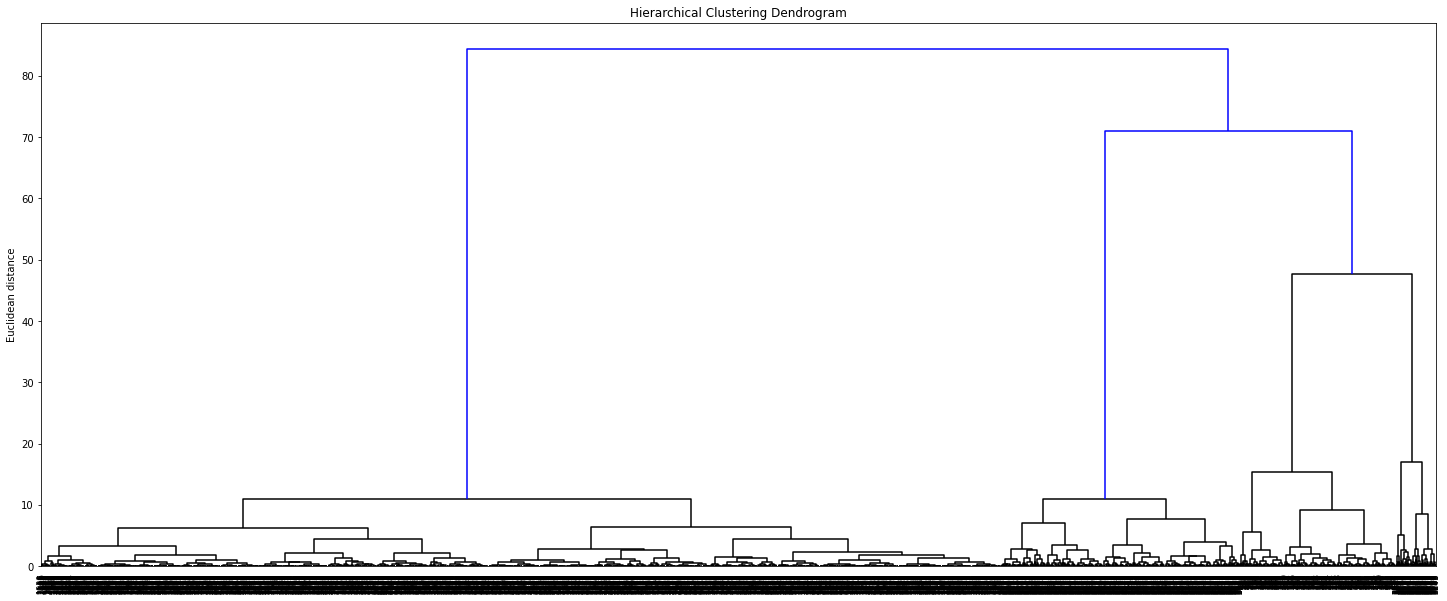

In [34]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel("Euclidean distance")
dendrogram(
    link,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

#### The above shown plot describes Hierarchical Clustering Dendrograms> This is a Bottom-Up Approach and we select the number of clusters by looking at Height of each clades. The more the height of clades(Vertical) we select that many clusters

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
model = AgglomerativeClustering(n_clusters=4)

In [37]:
model.fit(driver_data_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [38]:
model.labels_

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

#### The Silhouette_score for Agglomerative Clustering 

In [39]:
silhouette_score(driver_data_scaled, model.labels_)

0.77889704091338

In [40]:
import seaborn as sns

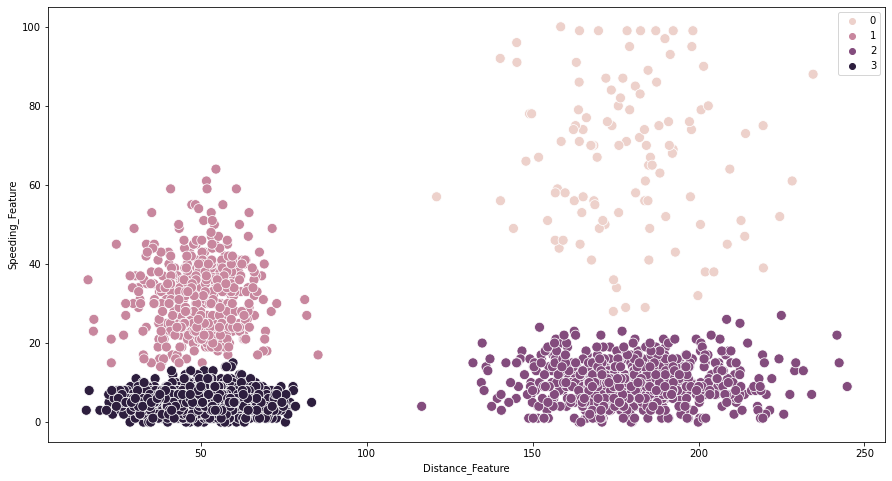

In [41]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Distance_Feature', y='Speeding_Feature', data=driver_data, hue=model.labels_, s=100)
plt.show()

#### Objective 3: Compare the results from your K-Means model and your Hierarchical clustering model using silhouette scores. Which model is superior?

* Silhouette Score of K-Means: **0.7843**
* Silhouette Score of Hierarchical Clustering: **0.7788**

Comparing results of KMeans and Hierarchical Clustering by silhouette scores we can see, The Scores of K-means is much better than Hierarchical Clustering. So for this dataset KMeans seems superior model as its scores are higher than Hierarchical.

### Some Additional Work

#### Another important Metrics for measuring the Clustering Score is David Bouldin Score which says lower Davies-Bouldin index relates to a model with better separation between the clusters.Values closer to zero indicate a better partition. 

From the Scores we can see that for Cluster 4 the Scores is closer to zero and So No. of Cluster=4 is best for this model.

Reference: https://esigma6.wordpress.com/2018/11/03/2-3-9-7-davies-bouldin-index/

In [28]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,7):
    km = KMeans(n_clusters=i, random_state=0).fit(driver_data_scaled)
    preds = km.predict(driver_data_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(driver_data_scaled)))
    km_scores.append(-km.score(driver_data_scaled))
    
    
    silhouette = silhouette_score(driver_data_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    
    db = davies_bouldin_score(driver_data_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))

Score for number of cluster(s) 2: -3911.926390428416
Silhouette score for number of cluster(s) 2: 0.7075955632562074
Davies Bouldin score for number of cluster(s) 2: 0.6519927181268099
Score for number of cluster(s) 3: -1756.5445821314272
Silhouette score for number of cluster(s) 3: 0.7636008195604073
Davies Bouldin score for number of cluster(s) 3: 0.6031502015401237
Score for number of cluster(s) 4: -739.153450864558
Silhouette score for number of cluster(s) 4: 0.7843727073779401
Davies Bouldin score for number of cluster(s) 4: 0.4149575817563682
Score for number of cluster(s) 5: -619.4037594867997
Silhouette score for number of cluster(s) 5: 0.7341393562942305
Davies Bouldin score for number of cluster(s) 5: 0.49992584377964056
Score for number of cluster(s) 6: -546.3668259384453
Silhouette score for number of cluster(s) 6: 0.6730709704232463
Davies Bouldin score for number of cluster(s) 6: 0.7496088827977482


1. https://medium.com/@rafaelnduarte/how-to-retrieve-data-from-spotify-110c859ab304
2. https://github.com/rafaelnduarte?tab=repositories
3. https://github.com/sejaldua/music-clustering
3. https://towardsdatascience.com/smote-for-imbalanced-datasets-with-python-30bfc211db42

**Knee Detection Algorithm**
1. https://github.com/arvkevi/kneed 